In [1]:
import networkx as nx

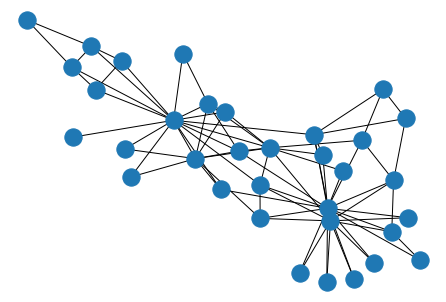

In [2]:
# Create a graph and visualize it
G = nx.karate_club_graph()

import matplotlib.pyplot as plt
nx.draw(G)

In [3]:
import gurobipy as gp
from gurobipy import GRB

In [4]:
# Each vertex must be assigned to a color from {0, 1, ..., k-1},
#    where k is an upper bound on how many colors are needed.
# For example, we can set k equal to the max degree plus one.
k = 1 + max( G.degree(i) for i in G.nodes )

# Create model object
m = gp.Model()

# Create variable for each node and (possible) color class
x = m.addVars( G.nodes, k, vtype=GRB.BINARY )

# Create variable for each (possible) color class
y = m.addVars( k, vtype=GRB.BINARY )

# Objective: minimize number of colors used
m.setObjective( gp.quicksum( y[j] for j in range(k) ), GRB.MINIMIZE )

# Constraints: suppose that only the smallest colors are used
m.addConstrs( y[j] >= y[j+1] for j in range(k-1) )

# Constraints: must assign each vertex i to some color 
m.addConstrs( gp.quicksum( x[i,j] for j in range(k) ) == 1 for i in G.nodes )
               
# Constraints: cannot assign endpoints {u,v} of an edge to same color
m.addConstrs( x[u,j] + x[v,j] <= y[j] for u,v in G.edges for j in range(k) )

# Constraints: cannot assign i->j when j is not a used color 
m.addConstrs( x[i,j] <= y[j] for i in G.nodes for j in range(k) )
               
# Solve
m.optimize()

Academic license - for non-commercial use only - expires 2021-07-26
Using license file C:\Users\Austin\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2067 rows, 630 columns and 6082 nonzeros
Model fingerprint: 0x1daad55c
Variable types: 0 continuous, 630 integer (630 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 11.0000000
Presolve removed 1629 rows and 247 columns
Presolve time: 0.18s
Presolved: 438 rows, 383 columns, 1847 nonzeros
Variable types: 0 continuous, 383 integer (383 binary)

Root relaxation: objective 5.000000e+00, 207 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0    

In [5]:
# Find the associated coloring
coloring = [ -1 for i in G.nodes ]

for i in G.nodes:
    for j in range(k):
        if x[i,j].x > 0.5:
            coloring[i] = j
        
print(coloring)

[4, 2, 1, 3, 1, 1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 3, 2, 4]


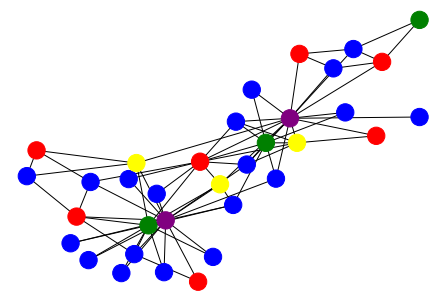

In [6]:
# Draw it
palette = ["blue", "red", "green", "yellow", "purple"]

node_colors = [ palette[coloring[i]] for i in G.nodes ]

nx.draw( G, node_color=node_colors )